# Maximizing revenue for cab drivers through the payment type analysis

## Problem statement 

Cab drivers often overlook how payment methods influence their earnings. Passenger choices between cash, card, or digital wallets may affect both average fare amounts and overall revenue patterns. This project analyzes trip data to uncover whether payment type significantly impacts fare values, providing data-driven insights that can help drivers and platforms optimize revenue strategies.

## Objectives

- To examine the relationship between payment methods (cash, card) and fare amounts using statistical analysis and A/B testing.  
- To determine whether payment type has a significant impact on driver revenue.   
- To provide data-driven recommendations that help cab drivers prioritize the most profitable payment methods.   
- To enable actionable insights for improving driver income strategies and enhancing overall revenue optimization.   

# Research Question 

### Does the choice of payment method (cash, card) significantly impact fare amounts and driver revenue, and how can these insights be used to optimize earning strategies for cab drivers?

In [4]:
# Import all libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as st
import warnings 
warnings.filterwarnings('ignore')

In [5]:
# Read dataset
df=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Pictures\Screenshots\excel project\2023_Green_Taxi_Trip_Data.csv")

In [6]:
df.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,01/01/2023 12:26:10 AM,01/01/2023 12:37:11 AM,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,01/01/2023 12:51:03 AM,01/01/2023 12:57:49 AM,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,01/01/2023 12:35:12 AM,01/01/2023 12:41:32 AM,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,01/01/2023 12:13:14 AM,01/01/2023 12:19:03 AM,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,01/01/2023 12:33:04 AM,01/01/2023 12:39:02 AM,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


# Exploratory Data Analysis

In [7]:
# Shape of the data
df.shape

(787060, 20)

In [8]:
# Ensure datetime columns are proper
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Create trip_duration column
df['trip_duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']

df['trip_duration']=df['trip_duration'].dt.total_seconds()/60

In [9]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
trip_duration                   float64
dtype: object

In [10]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'trip_duration'],
      dtype='object')

In [11]:
df=df[['passenger_count','trip_distance','payment_type','fare_amount','trip_duration']]

In [12]:
df.head(5)

,passenger_count,trip_distance,payment_type,fare_amount,trip_duration
0,1.0,2.58,1.0,14.9,11.016667
1,1.0,1.81,1.0,10.7,6.766667
2,1.0,0.00,1.0,7.2,6.333333
3,1.0,1.30,1.0,6.5,5.816667
4,1.0,1.10,1.0,6.0,5.966667


In [13]:
df.isnull().sum()

passenger_count    55613
trip_distance          0
payment_type       55613
fare_amount            0
trip_duration          0
dtype: int64

In [14]:
(55613/len(df))*100

7.06591619444515

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

passenger_count    0
trip_distance      0
payment_type       0
fare_amount        0
trip_duration      0
dtype: int64

In [17]:
df.dtypes

passenger_count    float64
trip_distance      float64
payment_type       float64
fare_amount        float64
trip_duration      float64
dtype: object

In [18]:
df['passenger_count']=df['passenger_count'].astype('int64')
df['payment_type ']=df['payment_type'].astype('int64')

In [19]:
df[df.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,trip_duration,payment_type
270,1,0.00,1.0,20.0,0.050000,1
273,1,0.00,1.0,20.0,0.050000,1
284,1,0.00,1.0,12.0,0.033333,1
758,1,0.00,2.0,70.0,0.333333,2
1912,1,1.40,1.0,7.5,7.800000,1
...,...,...,...,...,...,...
782168,1,0.64,2.0,5.8,3.533333,2
782171,1,0.71,2.0,7.2,5.666667,2
782181,1,1.15,1.0,7.9,6.083333,1
782183,1,2.02,1.0,12.1,9.583333,1


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.shape

(580999, 6)

In [22]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.812468
2    0.104418
5    0.033615
3    0.017265
6    0.015900
0    0.010151
4    0.006043
7    0.000072
8    0.000038
9    0.000029
Name: proportion, dtype: float64

In [23]:
df=df[df['payment_type']<3]
df=df[(df['passenger_count']>0)&(df['passenger_count']<6)]

In [24]:
df.shape

(560245, 6)

In [25]:
df['payment_type'].replace([1,2],["Card","Cash"],inplace=True)

In [26]:
df

,passenger_count,trip_distance,payment_type,fare_amount,trip_duration,payment_type
0,1,2.58,Card,14.9,11.016667,1
1,1,1.81,Card,10.7,6.766667,1
2,1,0.00,Card,7.2,6.333333,1
3,1,1.30,Card,6.5,5.816667,1
4,1,1.10,Card,6.0,5.966667,1
...,...,...,...,...,...,...
782186,1,4.47,Cash,21.2,15.333333,2
782187,1,14.44,Card,56.9,28.266667,1
782188,1,3.18,Cash,17.7,13.983333,2
782189,1,1.02,Cash,6.5,2.433333,2


In [27]:
df.describe()

,passenger_count,trip_distance,fare_amount,trip_duration,payment_type
count,560245.000000,560245.000000,560245.000000,560245.000000,560245.000000
mean,1.299458,3.373305,19.923258,22.595974,1.354047
std,0.835376,60.460555,20.260925,90.594665,0.478224
min,1.000000,0.000000,-1.500000,0.000000,1.000000
25%,1.000000,1.290000,10.700000,8.650000,1.000000
50%,1.000000,2.200000,15.600000,13.316667,1.000000
75%,1.000000,3.790000,23.300000,20.200000,2.000000
max,5.000000,29151.880000,4003.000000,1439.916667,2.000000


In [28]:
df=df[df['trip_distance']>0]
df=df[df['fare_amount']>0]
df=df[df['trip_duration']>0]

In [29]:
df.describe()

,passenger_count,trip_distance,fare_amount,trip_duration,payment_type
count,538055.000000,538055.000000,538055.000000,538055.000000,538055.000000
mean,1.304894,3.509456,19.510510,22.397468,1.361409
std,0.844157,61.690488,19.560196,91.499990,0.480409
min,1.000000,0.010000,0.010000,0.016667,1.000000
25%,1.000000,1.380000,10.700000,8.683333,1.000000
50%,1.000000,2.300000,14.900000,13.216667,1.000000
75%,1.000000,3.870000,22.600000,19.783333,2.000000
max,5.000000,29151.880000,4003.000000,1439.916667,2.000000


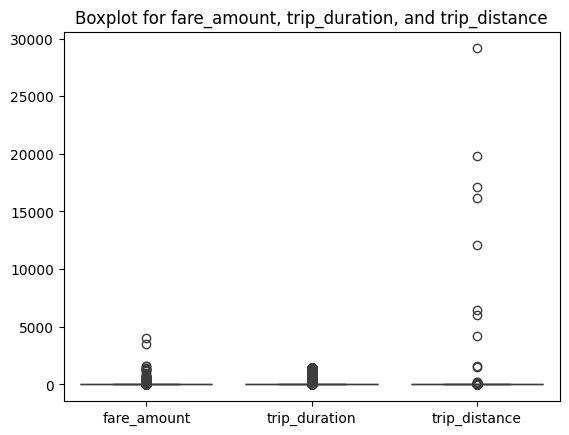

In [30]:

cols = ['fare_amount', 'trip_duration', 'trip_distance']

# Boxplot
sns.boxplot(data=df[cols])
plt.title("Boxplot for fare_amount, trip_duration, and trip_distance")
plt.show()

In [31]:
df.columns

Index(['passenger_count', 'trip_distance', 'payment_type', 'fare_amount',
       'trip_duration', 'payment_type '],
      dtype='object')

In [32]:
for col in ['fare_amount','trip_duration','trip_distance']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    # Filter the dataframe
    df = df[(df[col] > lower_bound) & (df[col] <= upper_bound)]

    

In [33]:
df.shape

(457217, 6)

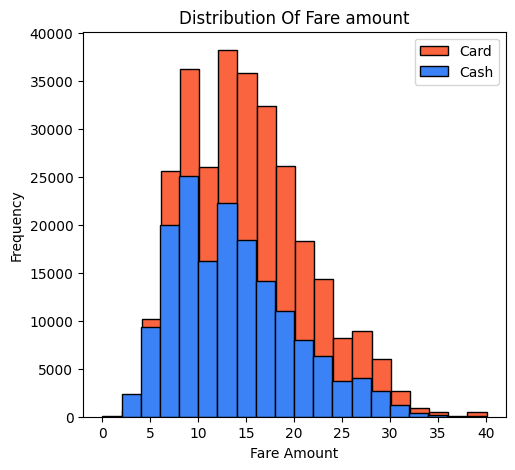

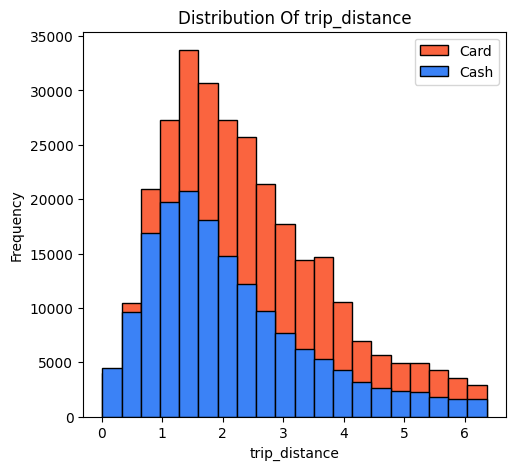

In [34]:
plt.figure(figsize=(12,5))   
plt.subplot(1,2,1)           
plt.title('Distribution Of Fare amount')

plt.hist(df[df['payment_type']=='Card']['fare_amount'],histtype='barstacked', bins=20,edgecolor='k',color='#FA643F',label='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#3B82F6',label='Cash')

plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(12,5)) 
plt.subplot(1,2,2)          
plt.title('Distribution Of trip_distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'],histtype='barstacked', bins=20,edgecolor='k',color='#FA643F',label='Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#3B82F6',label='Cash')

plt.xlabel('trip_distance')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [35]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           15.186240  6.230600      2.388701  1.343069
Cash           13.761881  6.180912      2.108091  1.335661

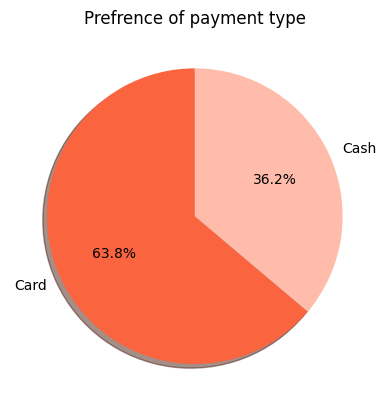

In [36]:
plt.title('Prefrence of payment type')
plt.pie(df['payment_type'].value_counts(normalize=True),labels=df['payment_type'].value_counts().index,
        startangle=90,shadow=True,autopct="%1.1f%%",colors=['#FA643F','#FFBCAB'])
plt.show()
        
          

In [37]:
df.columns

Index(['passenger_count', 'trip_distance', 'payment_type', 'fare_amount',
       'trip_duration', 'payment_type '],
      dtype='object')

In [38]:
passenger_count=df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)

In [39]:
passenger_count

,payment_type,passenger_count,count
0,Card,1,243569
1,Card,2,30658
2,Card,3,4881
3,Card,4,1770
4,Card,5,11006
5,Cash,1,137625
6,Cash,2,18470
7,Cash,3,3126
8,Cash,4,783
9,Cash,5,5329


In [40]:
passenger_count['Prc'] = (passenger_count['count'] / passenger_count['count'].sum()) * 100
passenger_count

,payment_type,passenger_count,count,Prc
0,Card,1,243569,53.272079
1,Card,2,30658,6.705350
2,Card,3,4881,1.067546
3,Card,4,1770,0.387125
4,Card,5,11006,2.407172
5,Cash,1,137625,30.100587
6,Cash,2,18470,4.039657
7,Cash,3,3126,0.683702
8,Cash,4,783,0.171253
9,Cash,5,5329,1.165530


In [41]:
print(passenger_count.columns)   # shows original column names


Index(['payment_type', 'passenger_count', 'count', 'Prc'], dtype='object')


In [42]:
df_new = passenger_count.pivot(index='payment_type', 
                               columns='passenger_count', 
                               values='Prc').reset_index()

df_new

passenger_count,payment_type,1,2,3,4,5
0,Card,53.272079,6.705350,1.067546,0.387125,2.407172
1,Cash,30.100587,4.039657,0.683702,0.171253,1.165530


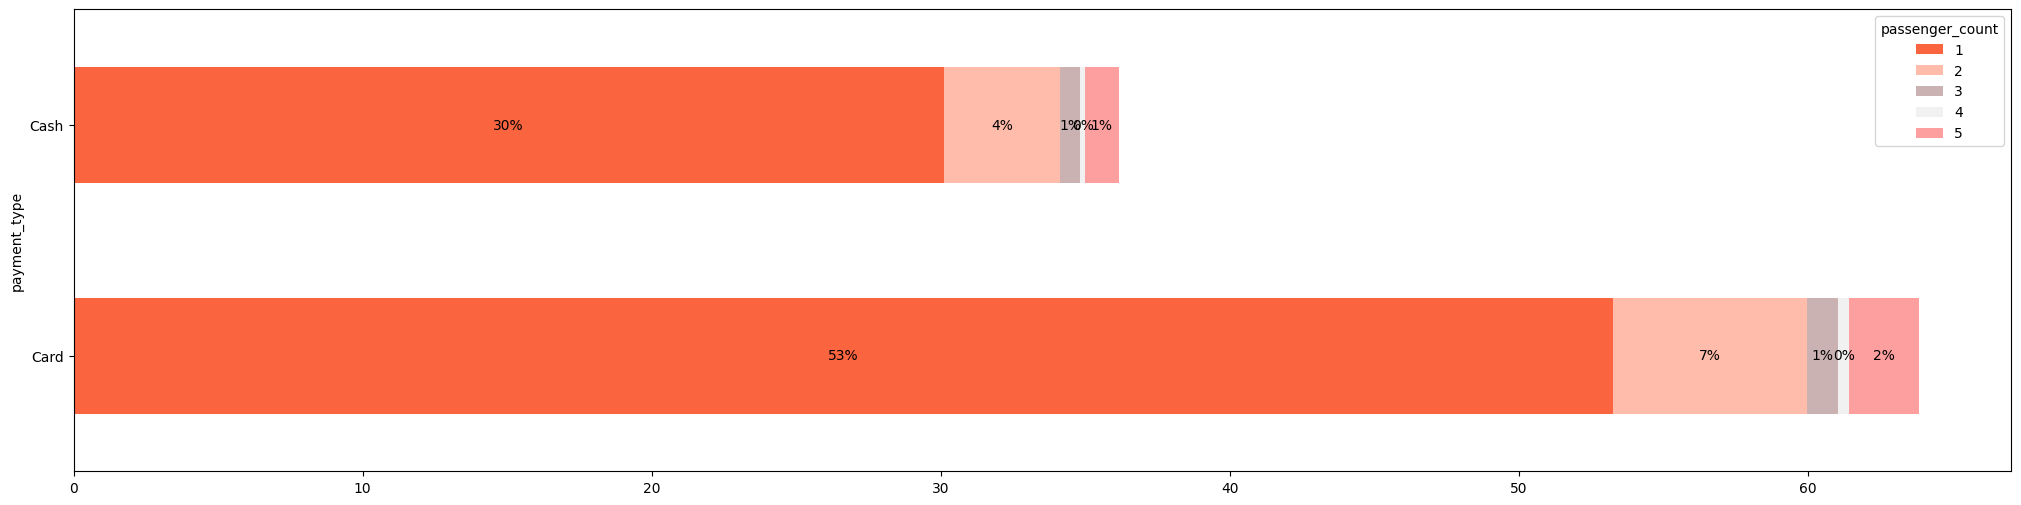

In [43]:
fig, ax = plt.subplots(figsize=(25,6))

# stacked bar chart
df_new.plot(x='payment_type',kind='barh',stacked=True,ax=ax,
    color=['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F']
)

# add percentage labels inside bars
for p in ax.patches:
    width = p.get_width()
    if width > 0:  # avoid labeling 0 values
        x, y = p.get_xy()
        height = p.get_height()
        ax.text(x + width/2,
                y + height/2,
                '{:.0f}%'.format(width),  # show integer %
                ha='center',
                va='center',
                fontsize=10,
                color='black')

# Null Hypothesis: There's no diffrence in  average between customers who use credit card and customers who use cash
# Alternative Hypothesis: there's diffrence in average between customers who use credit card and customers who use cash

In [44]:
Card_sample = df[df['payment_type'] == 'Card']['fare_amount']
Cash_sample = df[df['payment_type'] == 'Cash']['fare_amount']


In [45]:
t_stats,P_vlue = st.ttest_ind(a = Card_sample,b =  Cash_sample, equal_var=False)
print('T_Statistics',t_stats,'P_value',P_vlue)

T_Statistics 74.64946483888909 P_value 0.0


In [46]:
alpha = 0.05  # significance level

T_statistic = 74.64946483888909
p_value = 0.0

print(f"T-Statistic: {T_statistic:.4f}, P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject Null Hypothesis: There IS a significant difference "
          "between customers who use credit card and customers who use cash.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference found.")


T-Statistic: 74.6495, P-value: 0.0000
Reject Null Hypothesis: There IS a significant difference between customers who use credit card and customers who use cash.


## Result (from your test): Since the p-value ≈ 0.0 (much less than 0.05), we reject the null hypothesis.

## Conclusion:
The payment method does impact fare amount. Specifically, card payments are statistically associated with higher fares, suggesting drivers earn more per ride when passengers pay by card.

# 🚖 Final Conclusion

### Our analysis shows a clear link between payment type and driver revenue:
### Card payments dominate across all fare ranges (53% vs. 30% in the lowest range, and consistently higher in longer/higher fares).
### Fare distribution proves that card users take more high-value and long-distance trips, while cash trips are more common for smaller fares.
### Payment preference trends confirm that a majority of passengers (63.8%) choose card, reflecting a strong shift toward cashless rides.
### Hypothesis testing validates this: payment type has a significant impact on fare amounts, with card fares being statistically higher.

# 💡 Impact: While cash provides ride volume, card transactions bring higher earnings per ride and dominate customer preference. For drivers, encouraging card payments is the most effective strategy to maximize revenue and long-term income stability.